In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [ ]:
!kaggle competitions download -c spaceship_titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 84.5MB/s]


In [ ]:
!unzip "/content/spaceship-titanic.zip"

Archive:  /content/spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
raw = pd.read_csv("/content/train.csv")

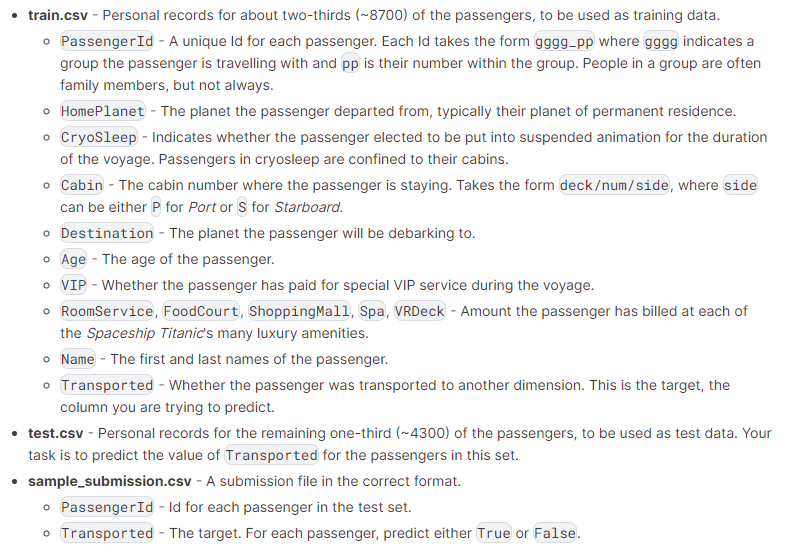

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
display(raw.isnull().sum())
print("="*40)
print("columns amount include nan: {}".format(raw[raw.isnull().any(axis=1)].shape[0]))

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

columns amount include nan: 2087


In [ ]:
raw.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
raw.describe(include=["O"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


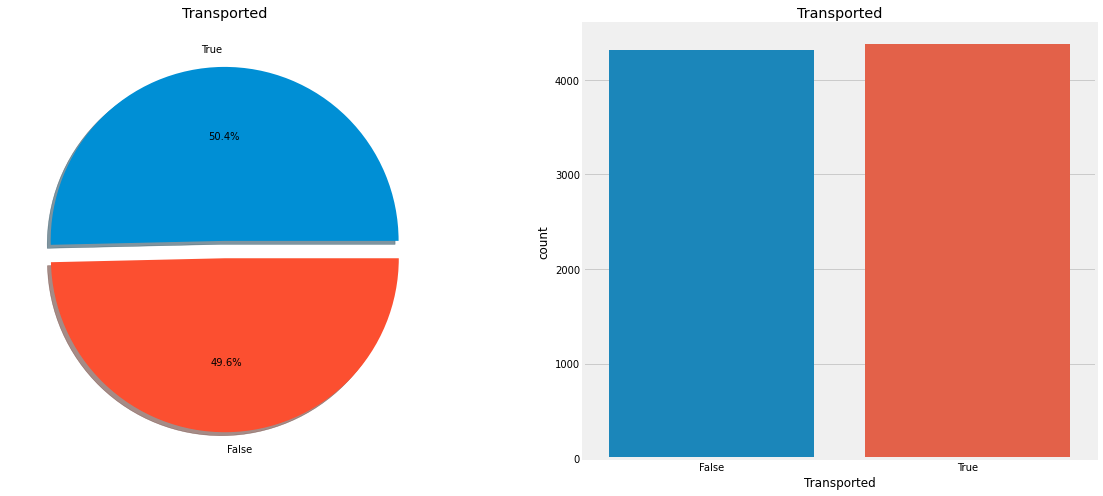

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
raw["Transported"].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Transported")
ax[0].set_ylabel("")
sns.countplot("Transported", data=raw, ax=ax[1])
ax[1].set_title("Transported")
plt.show()

In [ ]:
raw.groupby(["HomePlanet", "Transported"])["Transported"].count()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      False           727
            True           1404
Mars        False           839
            True            920
Name: Transported, dtype: int64

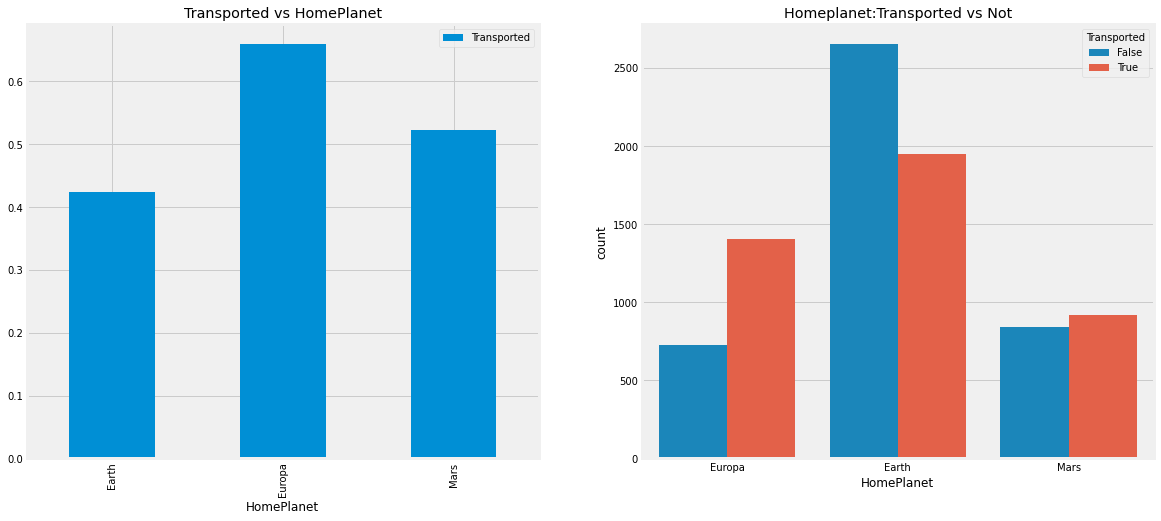

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
raw[["HomePlanet", "Transported"]].groupby("HomePlanet").mean().plot.bar(ax=ax[0])
ax[0].set_title("Transported vs HomePlanet")
sns.countplot("HomePlanet", hue="Transported", data=raw, ax=ax[1])
ax[1].set_title("Homeplanet:Transported vs Not")
plt.show()

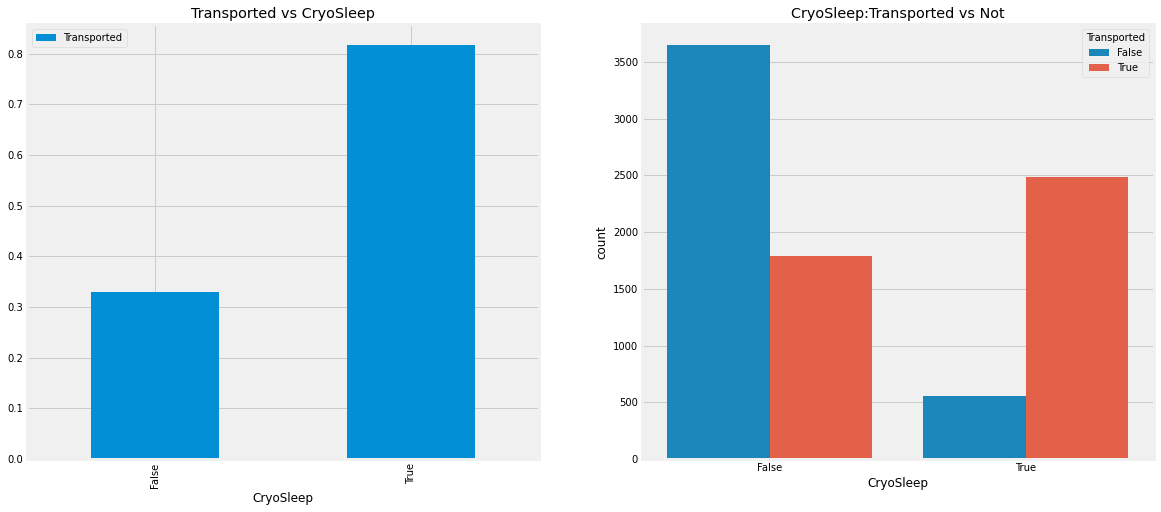

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
raw[["CryoSleep", "Transported"]].groupby("CryoSleep").mean().plot.bar(ax=ax[0])
ax[0].set_title("Transported vs CryoSleep")
sns.countplot("CryoSleep", hue="Transported", data=raw, ax=ax[1])
ax[1].set_title("CryoSleep:Transported vs Not")
plt.show()

In [ ]:
raw[["GroupId", "IdInGroup"]] = raw["PassengerId"].str.split("_", expand=True)

In [ ]:
raw.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,IdInGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [ ]:
temp = raw["GroupId"].value_counts().to_frame().reset_index()
temp.columns = ["GroupId", "NumCompanions"]
temp

,GroupId,NumCompanions
0,4498,8
1,8168,8
2,8728,8
3,8796,8
4,8956,8
...,...,...
6212,3483,1
6213,3480,1
6214,3478,1
6215,3473,1


In [ ]:
raw.merge(temp, how="left", on="GroupId")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,IdInGroup,NumCompanions
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,2


In [ ]:
raw[["deck", "num", "side"]] = raw["Cabin"].str.split("/", expand=True)

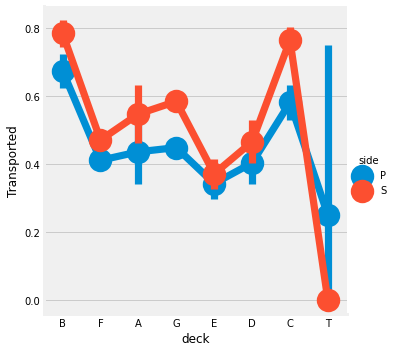

In [ ]:
sns.factorplot("deck", "Transported", hue="side", data=raw)

In [ ]:
print('Oldest Passenger was of:',raw['Age'].max(),'Years')
print('Youngest Passenger was of:',raw['Age'].min(),'Years')
print('Average Age on the ship:',raw['Age'].mean(),'Years')

Oldest Passenger was of: 79.0 Years
Youngest Passenger was of: 0.0 Years
Average Age on the ship: 28.82793046746535 Years


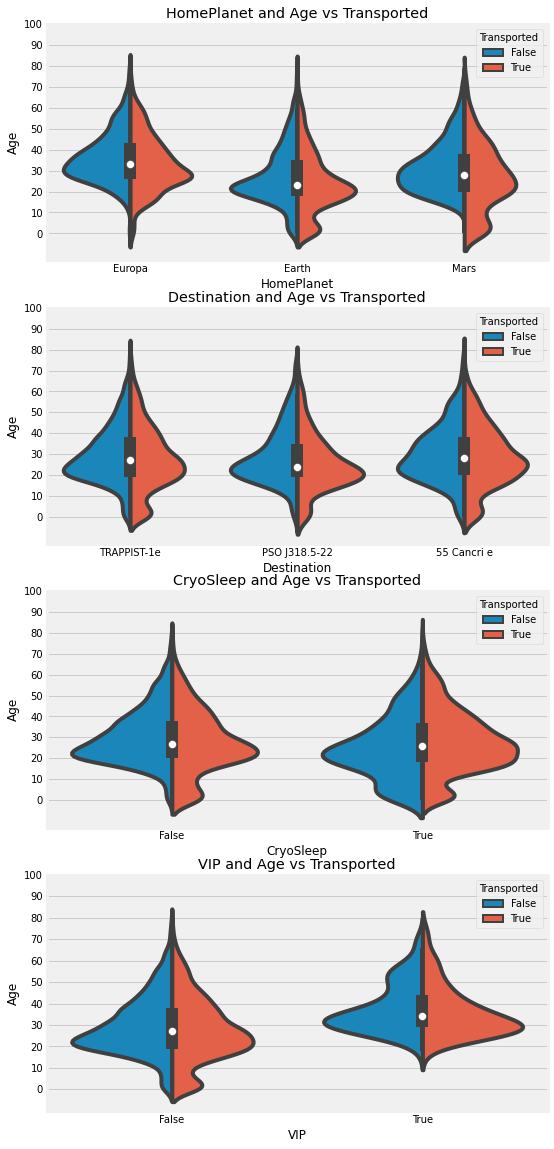

In [ ]:
f,ax=plt.subplots(4, 1, figsize=(8,20))
sns.violinplot("HomePlanet", "Age", hue="Transported", data=raw, split=True, ax=ax[0])
ax[0].set_title('HomePlanet and Age vs Transported')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Destination", "Age", hue="Transported", data=raw, split=True, ax=ax[1])
ax[1].set_title('Destination and Age vs Transported')
ax[1].set_yticks(range(0,110,10))
sns.violinplot("CryoSleep", "Age", hue="Transported", data=raw, split=True, ax=ax[2])
ax[2].set_title('CryoSleep and Age vs Transported')
ax[2].set_yticks(range(0,110,10))
sns.violinplot("VIP", "Age", hue="Transported", data=raw, split=True, ax=ax[3])
ax[3].set_title('VIP and Age vs Transported')
ax[3].set_yticks(range(0,110,10))
plt.show()

<AxesSubplot:>

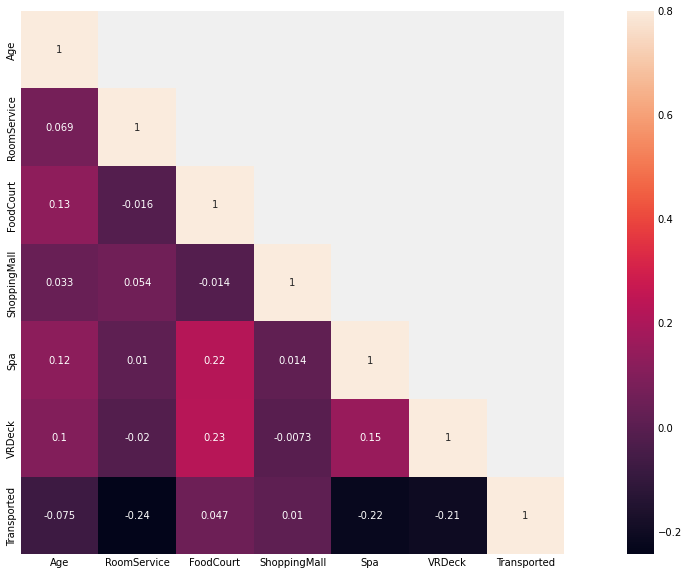

In [ ]:
corrMatt = raw.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

In [ ]:
raw.drop(["PassengerId", "Cabin", "Name", "GroupId", "IdInGroup", "num"], axis=1, inplace=True)

In [ ]:
raw

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S


In [ ]:
train = pd.read_csv("/content/train.csv")
test_raw = pd.read_csv("/content/test.csv")

In [ ]:
raw = pd.concat([train, test_raw])
raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [ ]:
raw[["GroupId", "IdInGroup"]] = raw["PassengerId"].str.split("_", expand=True)

In [ ]:
temp = raw["GroupId"].value_counts().to_frame().reset_index()
temp.columns = ["GroupId", "NumCompanions"]
temp

,GroupId,NumCompanions
0,6499,8
1,8728,8
2,0984,8
3,4256,8
4,6986,8
...,...,...
9275,5190,1
9276,5187,1
9277,5186,1
9278,5185,1


In [ ]:
raw.merge(temp, how="left", on="GroupId")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,IdInGroup,NumCompanions
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,9266,02,2
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,9269,01,1
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,9271,01,1
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,9273,01,1


In [ ]:
raw[["deck", "num", "side"]] = raw["Cabin"].str.split("/", expand=True)

In [ ]:
raw.drop(["PassengerId", "Cabin", "Name", "GroupId", "IdInGroup", "num"], axis=1, inplace=True)

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  object 
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Transported   8693 non-null   object 
 11  deck          12671 non-null  object 
 12  side          12671 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.4+ MB


impute nan

In [ ]:
mask = raw.columns != "Transported"

In [ ]:
from sklearn.impute import SimpleImputer

simimpu = SimpleImputer(strategy="most_frequent")
raw[["HomePlanet", "Destination", "deck", "side"]] = \
  simimpu.fit_transform(raw[["HomePlanet", "Destination", "deck", "side"]])

In [ ]:
raw[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = \
  raw[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(0)

In [ ]:
raw[raw.columns[mask]] = raw[raw.columns[mask]].fillna(raw[raw.columns[mask]].mean())

encoding

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  object 
 2   Destination   12970 non-null  object 
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  object 
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   8693 non-null   object 
 11  deck          12970 non-null  object 
 12  side          12970 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.4+ MB


In [ ]:
# Get list of categorical variables
s = (raw[raw.columns[mask]].dtypes == 'object')
object_cols = list(s[s].index)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(raw[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = raw.index

OH_cols.columns = OH_cols.columns.astype("str")

# Remove categorical columns (will replace with one-hot encoding)
num_raw = raw.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_raw = pd.concat([num_raw, OH_cols], axis=1)

In [ ]:
OH_raw

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2,...,12,13,14,15,16,17,18,19,20,21
0,39.000000,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24.000000,109.0,9.0,25.0,549.0,44.0,True,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,58.000000,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.000000,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16.000000,303.0,70.0,151.0,565.0,2.0,True,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4273,42.000000,0.0,847.0,17.0,10.0,144.0,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4274,28.771969,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4275,28.771969,0.0,2680.0,0.0,0.0,523.0,NaN,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
OH_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           12970 non-null  float64
 1   RoomService   12970 non-null  float64
 2   FoodCourt     12970 non-null  float64
 3   ShoppingMall  12970 non-null  float64
 4   Spa           12970 non-null  float64
 5   VRDeck        12970 non-null  float64
 6   Transported   8693 non-null   object 
 7   0             12970 non-null  float64
 8   1             12970 non-null  float64
 9   2             12970 non-null  float64
 10  3             12970 non-null  float64
 11  4             12970 non-null  float64
 12  5             12970 non-null  float64
 13  6             12970 non-null  float64
 14  7             12970 non-null  float64
 15  8             12970 non-null  float64
 16  9             12970 non-null  float64
 17  10            12970 non-null  float64
 18  11            12970 non-nul

learning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test = OH_raw[OH_raw["Transported"].isna()]
X = OH_raw.dropna(axis=0)

In [ ]:
y = X.pop("Transported")
y = y.astype("bool")

In [ ]:
test.drop("Transported", axis=1, inplace=True)

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)
pred = model.predict(test)
pred

array([0.78362302, 0.        , 1.        , ..., 1.        , 0.73      ,
       0.22480952])

In [ ]:
bool_pred = pred >=0.5
bool_pred

array([ True, False,  True, ...,  True,  True, False])

In [ ]:
bool_pred = pd.Series(bool_pred, index=test_raw["PassengerId"], name="Transported")
bool_pred

PassengerId
0013_01     True
0018_01    False
0019_01     True
0021_01     True
0023_01    False
           ...  
9266_02     True
9269_01    False
9271_01     True
9273_01     True
9277_01    False
Name: Transported, Length: 4277, dtype: bool

submit csv

In [ ]:
bool_pred.to_csv("/content/drive/MyDrive/kaggle/spaceship_titanic.csv")

xgboost-guide

In [ ]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json
from sklearn import manifold

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from xgboost import plot_tree

warnings.filterwarnings('ignore')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
def xgb_helper(Parameters, V_Param_Name=False, V_Param_Values=False, BR=10):
  dmatrix =  xgb.DMatrix(data=X_train, label=y_train)

  if V_Param_Values==False:
    cv_results = xgb.cv(dtrain=dmatrix, nfold=5, num_boost_round=10,
                      params=Parameters, as_pandas=True, seed=123)
    return cv_results

  else:
    results = []
    for v_param_value in V_Param_Values:
      Parameters[V_Param_Name] = v_param_value
      cv_results = xgb.cv(dtrain=dmatrix, nfold=5, num_boost_round=10, 
                          params=Parameters, as_pandas=True, seed=123)
      results.append((cv_results["train-auc-mean"].tail().values[-1],
                      cv_results["test-auc-mean"].tail().values[-1]))
      
      data = list(zip(V_Param_Values, results))
    print(pd.DataFrame(data, columns=[V_Param_Name, "auc"]))
      
    return cv_results

In [ ]:
Parameters = {"objective":"binary:logistic", "eval_metric":"auc"}

In [ ]:
xgb_helper(Parameters)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.873686,0.007329,0.846885,0.009510
1,0.892874,0.002077,0.865018,0.007976
2,0.899521,0.002089,0.869244,0.009245
3,0.902784,0.002120,0.871614,0.011554
4,0.906096,0.001715,0.873928,0.011975
5,0.909335,0.001504,0.877296,0.010785
6,0.912765,0.001110,0.879021,0.011021
7,0.915564,0.001470,0.880322,0.011576
8,0.918434,0.001103,0.881708,0.012063
9,0.921475,0.001311,0.881702,0.011625


In [ ]:
housing_dmatrix =xgb.DMatrix(data=X_train, label=y_train)

# Create the parameter dictionary for each tree: params 
params = {"objective":"binary:logistic", "max_depth":5}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15, 20, 25]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=5,
                        num_boost_round=curr_num_rounds, metrics="auc",
                        as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-auc-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","auc"]))

   num_boosting_rounds       auc
0                    5  0.870162
1                   10  0.879934
2                   15  0.882086
3                   20  0.883292
4                   25  0.882953


In [ ]:
Parameters={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5}
xgb_helper(Parameters)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.873686,0.007329,0.846885,0.009510
1,0.896049,0.001659,0.866770,0.008474
2,0.903453,0.002277,0.872482,0.010595
3,0.909049,0.001894,0.876474,0.009734
4,0.913711,0.002301,0.878876,0.007983
5,0.919427,0.001698,0.879286,0.008321
6,0.921721,0.001856,0.880804,0.008666
7,0.923587,0.001587,0.880535,0.009007
8,0.925994,0.002161,0.880560,0.009029
9,0.928662,0.002779,0.881144,0.009107


In [ ]:
Parameters={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5}
V_Param_Name="max_depth"
V_Param_Values=range(3,10,1)

data=xgb_helper(Parameters,V_Param_Name=V_Param_Name,V_Param_Values=V_Param_Values)

   max_depth                                       auc
0          3  (0.8927700671607974, 0.8746942832307105)
1          4  (0.9058373672830422, 0.8810932985433289)
2          5  (0.9163655796626007, 0.8821098208754531)
3          6  (0.9286622549822221, 0.8811436495523182)
4          7  (0.9400004489500597, 0.8780486930030499)
5          8  (0.9492937824981006, 0.8785672075729508)
6          9  (0.9579089470532978, 0.8760952802032376)


In [ ]:
Parameters={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5}
V_Param_Name="min_child_weight"
V_Param_Values=range(0,5,1)

data=xgb_helper(Parameters,V_Param_Name=V_Param_Name,V_Param_Values=V_Param_Values);

   min_child_weight                                       auc
0                 0  (0.9184236453720007, 0.8808965847076943)
1                 1  (0.9163655796626007, 0.8821098208754531)
2                 2  (0.9150109244156004, 0.8808274994879124)
3                 3  (0.9127309433870614, 0.8810846713455238)
4                 4  (0.9128812135757602, 0.8832019841836175)


In [ ]:
Parameters={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1}
V_Param_Name = "gamma"
V_Param_Values = [0.1,0.2,0.5,1,1.5,2]

data=xgb_helper(Parameters,V_Param_Name=V_Param_Name,V_Param_Values=V_Param_Values);

   gamma                                       auc
0    0.1  (0.9163410665456384, 0.8821470971194433)
1    0.2  (0.9163288942050165, 0.8825169640762223)
2    0.5  (0.9166312084721756, 0.8844009833359066)
3    1.0  (0.9159134725078613, 0.8831851424623627)
4    1.5  (0.9152547784325794, 0.8822448562542698)
5    2.0  (0.9152965319690891, 0.8822484553868977)


In [ ]:
Parameters={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,"gamma":1}
V_Param_Name = "subsample"
V_Param_Values = [.4,.5,.6,.7,.8,.9]

data=xgb_helper(Parameters,V_Param_Name=V_Param_Name,V_Param_Values=V_Param_Values);

   subsample                                       auc
0        0.4   (0.905861290240139, 0.8745435518128298)
1        0.5  (0.9083552390711617, 0.8770388186088788)
2        0.6  (0.9114463882860777, 0.8784100462736607)
3        0.7  (0.9138422045631736, 0.8816301692686525)
4        0.8  (0.9153417628935141, 0.8804103922046489)
5        0.9  (0.9153702833053476, 0.8817726511573962)


In [ ]:
Parameters={"objective":'binary:logistic',"eval_metric":"auc","max_depth":5,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.8, "scale_pos_weight":1,"reg_alpha":0.15,
           "reg_lambda":1,"learning_rate": 0.3}

clf = xgb.XGBClassifier( tree_method="gpu_hist",objective="binary:logistic",eval_metric="auc",max_depth=5,min_child_weight=1,
            gamma=1,subsample=0.7,colsample_bytree=.8, scale_pos_weight=1,reg_alpha=0.15,
           reg_lambda=1,learning_rate= 0.3,n_estimators=800)

clf.fit(X_train,y_train)

clf.save_model("categorical-model.json")

In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1303
           1       0.78      0.82      0.80      1305

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)

ImportError: ignored